#Setup

*Obs: if you're testing this notebook locally, be sure to have scikit-learn and Jinja2 installed.*

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Understanding the Data

In [2]:
grades = pd.read_csv('../src/student_marks.csv')
grades.head(10)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,78,87,91,91,88,98,94,100,100,100,100,93
1,22001,79,71,81,72,73,68,59,69,59,60,61,67
2,22002,66,65,70,74,78,86,87,96,88,82,90,86
3,22003,60,58,54,61,54,57,64,62,72,63,72,76
4,22004,99,95,96,93,97,89,92,98,91,98,95,88
5,22005,41,36,35,28,35,36,27,26,19,22,27,31
6,22006,47,50,47,57,62,64,71,75,85,87,85,89
7,22007,84,74,70,68,58,59,56,56,64,70,67,59
8,22008,74,64,58,57,53,51,47,45,42,43,34,24
9,22009,87,81,73,74,71,63,53,45,39,43,46,38


As we can see, the table is used to register students' grades throughout the course year. No information about the subject or content of each test is given, so, for this analysis, we're focusing on understanding the students notes.

However, to make this analysis easier, two main changes will be made:
1. The *'Student_ID'* column will be changed to *'string'* type because the numbers won't be used for statistics purposes;
2. The grades will be divided by 10 so it fits the standard grading in Brazil.

In [3]:
grades = grades.astype({'Student_ID': 'string'})

for col in grades.columns[1:]:
  grades[col] = grades[col] / 10

grades.head(10)

,Student_ID,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
0,22000,7.8,8.7,9.1,9.1,8.8,9.8,9.4,10.0,10.0,10.0,10.0,9.3
1,22001,7.9,7.1,8.1,7.2,7.3,6.8,5.9,6.9,5.9,6.0,6.1,6.7
2,22002,6.6,6.5,7.0,7.4,7.8,8.6,8.7,9.6,8.8,8.2,9.0,8.6
3,22003,6.0,5.8,5.4,6.1,5.4,5.7,6.4,6.2,7.2,6.3,7.2,7.6
4,22004,9.9,9.5,9.6,9.3,9.7,8.9,9.2,9.8,9.1,9.8,9.5,8.8
5,22005,4.1,3.6,3.5,2.8,3.5,3.6,2.7,2.6,1.9,2.2,2.7,3.1
6,22006,4.7,5.0,4.7,5.7,6.2,6.4,7.1,7.5,8.5,8.7,8.5,8.9
7,22007,8.4,7.4,7.0,6.8,5.8,5.9,5.6,5.6,6.4,7.0,6.7,5.9
8,22008,7.4,6.4,5.8,5.7,5.3,5.1,4.7,4.5,4.2,4.3,3.4,2.4
9,22009,8.7,8.1,7.3,7.4,7.1,6.3,5.3,4.5,3.9,4.3,4.6,3.8


In [4]:
# Understanding the columns
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  56 non-null     string 
 1   Test_1      56 non-null     float64
 2   Test_2      56 non-null     float64
 3   Test_3      56 non-null     float64
 4   Test_4      56 non-null     float64
 5   Test_5      56 non-null     float64
 6   Test_6      56 non-null     float64
 7   Test_7      56 non-null     float64
 8   Test_8      56 non-null     float64
 9   Test_9      56 non-null     float64
 10  Test_10     56 non-null     float64
 11  Test_11     56 non-null     float64
 12  Test_12     56 non-null     float64
dtypes: float64(12), string(1)
memory usage: 5.8 KB


In [5]:
# Getting basic statistics
grades.describe().style.format('{:.2f}')

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
count,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00,56.00
mean,7.08,6.92,6.81,6.74,6.73,6.60,6.62,6.53,6.44,6.42,6.45,6.59
std,1.70,1.77,1.88,1.98,2.07,2.11,2.14,2.27,2.32,2.26,2.26,2.25
min,4.00,3.40,3.50,2.80,2.60,2.90,2.60,1.90,0.90,1.20,1.90,2.00
25%,5.78,5.57,5.30,5.45,5.38,5.02,4.70,4.57,4.40,4.57,4.67,4.67
50%,7.05,6.85,7.00,7.15,6.90,6.55,6.40,6.75,6.55,6.55,6.40,6.75
75%,8.40,8.33,8.50,8.40,8.53,8.38,8.53,8.32,8.43,8.33,8.40,8.65
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


Thankfully, there are no missing values and the dataset is well completed, so the risk we have of doing a wrong analysis is basically 0%.

Gettting some comprehensive analysis will help us understand better how well the students are performing.

In [6]:
# Getting Mean and Median for each test
grades_mm = pd.DataFrame({'Test': grades.columns[1:],
                          'Mean': grades.mean(numeric_only=True),
                          'Median': grades.median(numeric_only=True)})
grades_mm.reset_index(inplace=True)
grades_mm = grades_mm[['Test', 'Mean', 'Median']]
grades_mm.style.format('{:.2f}', subset=['Mean', 'Median'])

,Test,Mean,Median
0,Test_1,7.08,7.05
1,Test_2,6.92,6.85
2,Test_3,6.81,7.00
3,Test_4,6.74,7.15
4,Test_5,6.73,6.90
5,Test_6,6.60,6.55
6,Test_7,6.62,6.40
7,Test_8,6.53,6.75
8,Test_9,6.44,6.55
9,Test_10,6.42,6.55


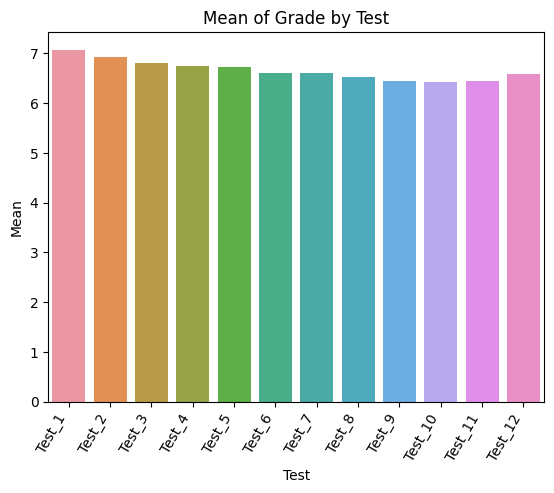

In [7]:
# Plotting Mean
sns.barplot(data=grades_mm, x='Test', y='Mean')
plt.title('Mean of Grade by Test')
plt.xticks(rotation=60, ha='right');

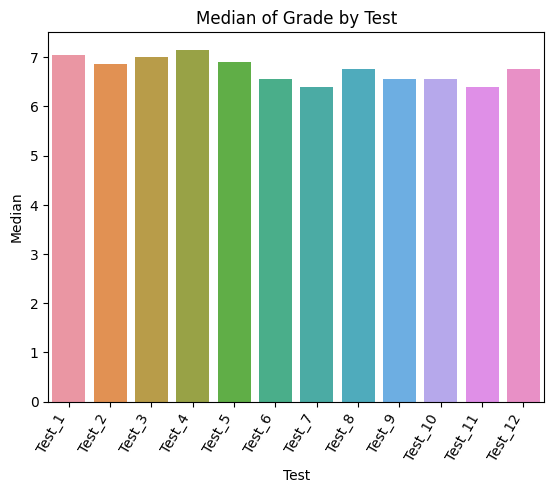

In [8]:
# Plotting Median
sns.barplot(data=grades_mm, x='Test', y='Median')
plt.title('Median of Grade by Test')
plt.xticks(rotation=60, ha='right');

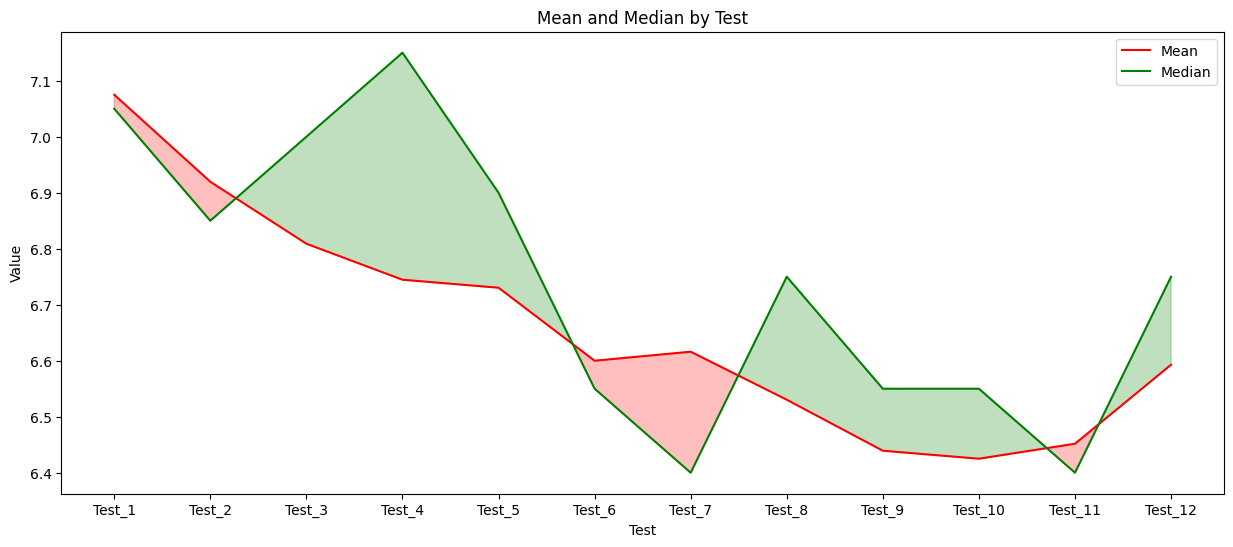

In [9]:
# Understanding the difference of values between the two
fig, ay = plt.subplots(figsize=(15, 6))
sns.lineplot(data=grades_mm, x='Test', y='Mean', color='red', label='Mean')
sns.lineplot(data=grades_mm, x='Test', y='Median', color='green', label='Median')
ay.fill_between(
    grades_mm['Test'], grades_mm['Mean'], grades_mm['Median'],
    where=(grades_mm['Mean'] > grades_mm['Median']),
    interpolate=True, color='red', alpha=0.25
    )
ay.fill_between(
    grades_mm['Test'], grades_mm['Mean'], grades_mm['Median'],
    where=(grades_mm['Mean'] < grades_mm['Median']),
    interpolate=True, color='green', alpha=0.25
    )
ay.legend()
plt.xlabel('Test')
plt.ylabel('Value')
plt.title("Mean and Median by Test");

Until here, it's important to note that the overall performance of the class decreased significantly from test 1 to 10, dropping the class' mean by 0.66 points, but it started to recover from test 11 to 12.

In spite of that, this decrease is happening mostly because of some students, not all of them, if we count in the fact that the class' median grades continue pretty high (except, of course, for tests 7 and 11).

The latter can be well seen in the next graphs.

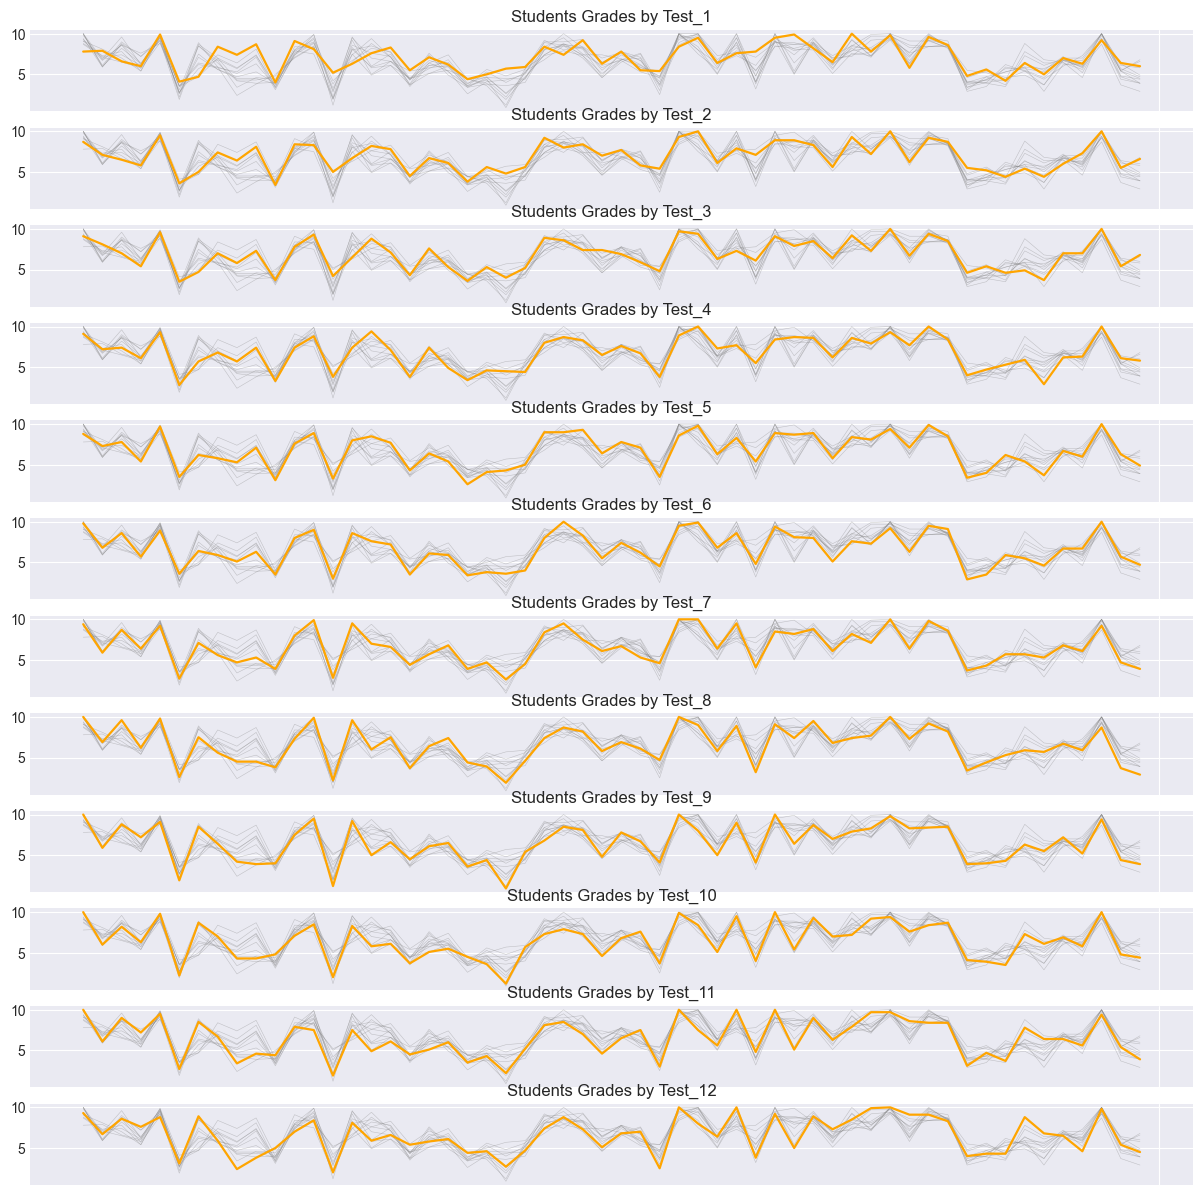

In [10]:
# Plotting a comparison multi-graph for each test
plt.figure(figsize=(15,15))
plt.style.use('seaborn-v0_8-darkgrid')
palette = plt.get_cmap('Set1')
n = 0
for col in grades.columns[1:]:
  n += 1
  plt.subplot(12, 1, n)
  for v in grades.columns[1:]:
    plt.plot(grades['Student_ID'], grades[v], marker='', color='gray', linewidth=0.4, alpha=0.4)
    plt.xticks(ticks='')
  plt.plot(grades['Student_ID'], grades[col], marker='', color='orange', linewidth=1.6, alpha=1)
  plt.xticks(ticks='');
  plt.title(f'Students Grades by {col}')

It's interesting to see that, even though there are some variations, the students have consistent grades, which helps to determine which ones need more assistance to improve.

For the last part, it's necessary to see if there's enough correlation among the grades for each test, or else the model might not work properly.

c:\Users\louzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


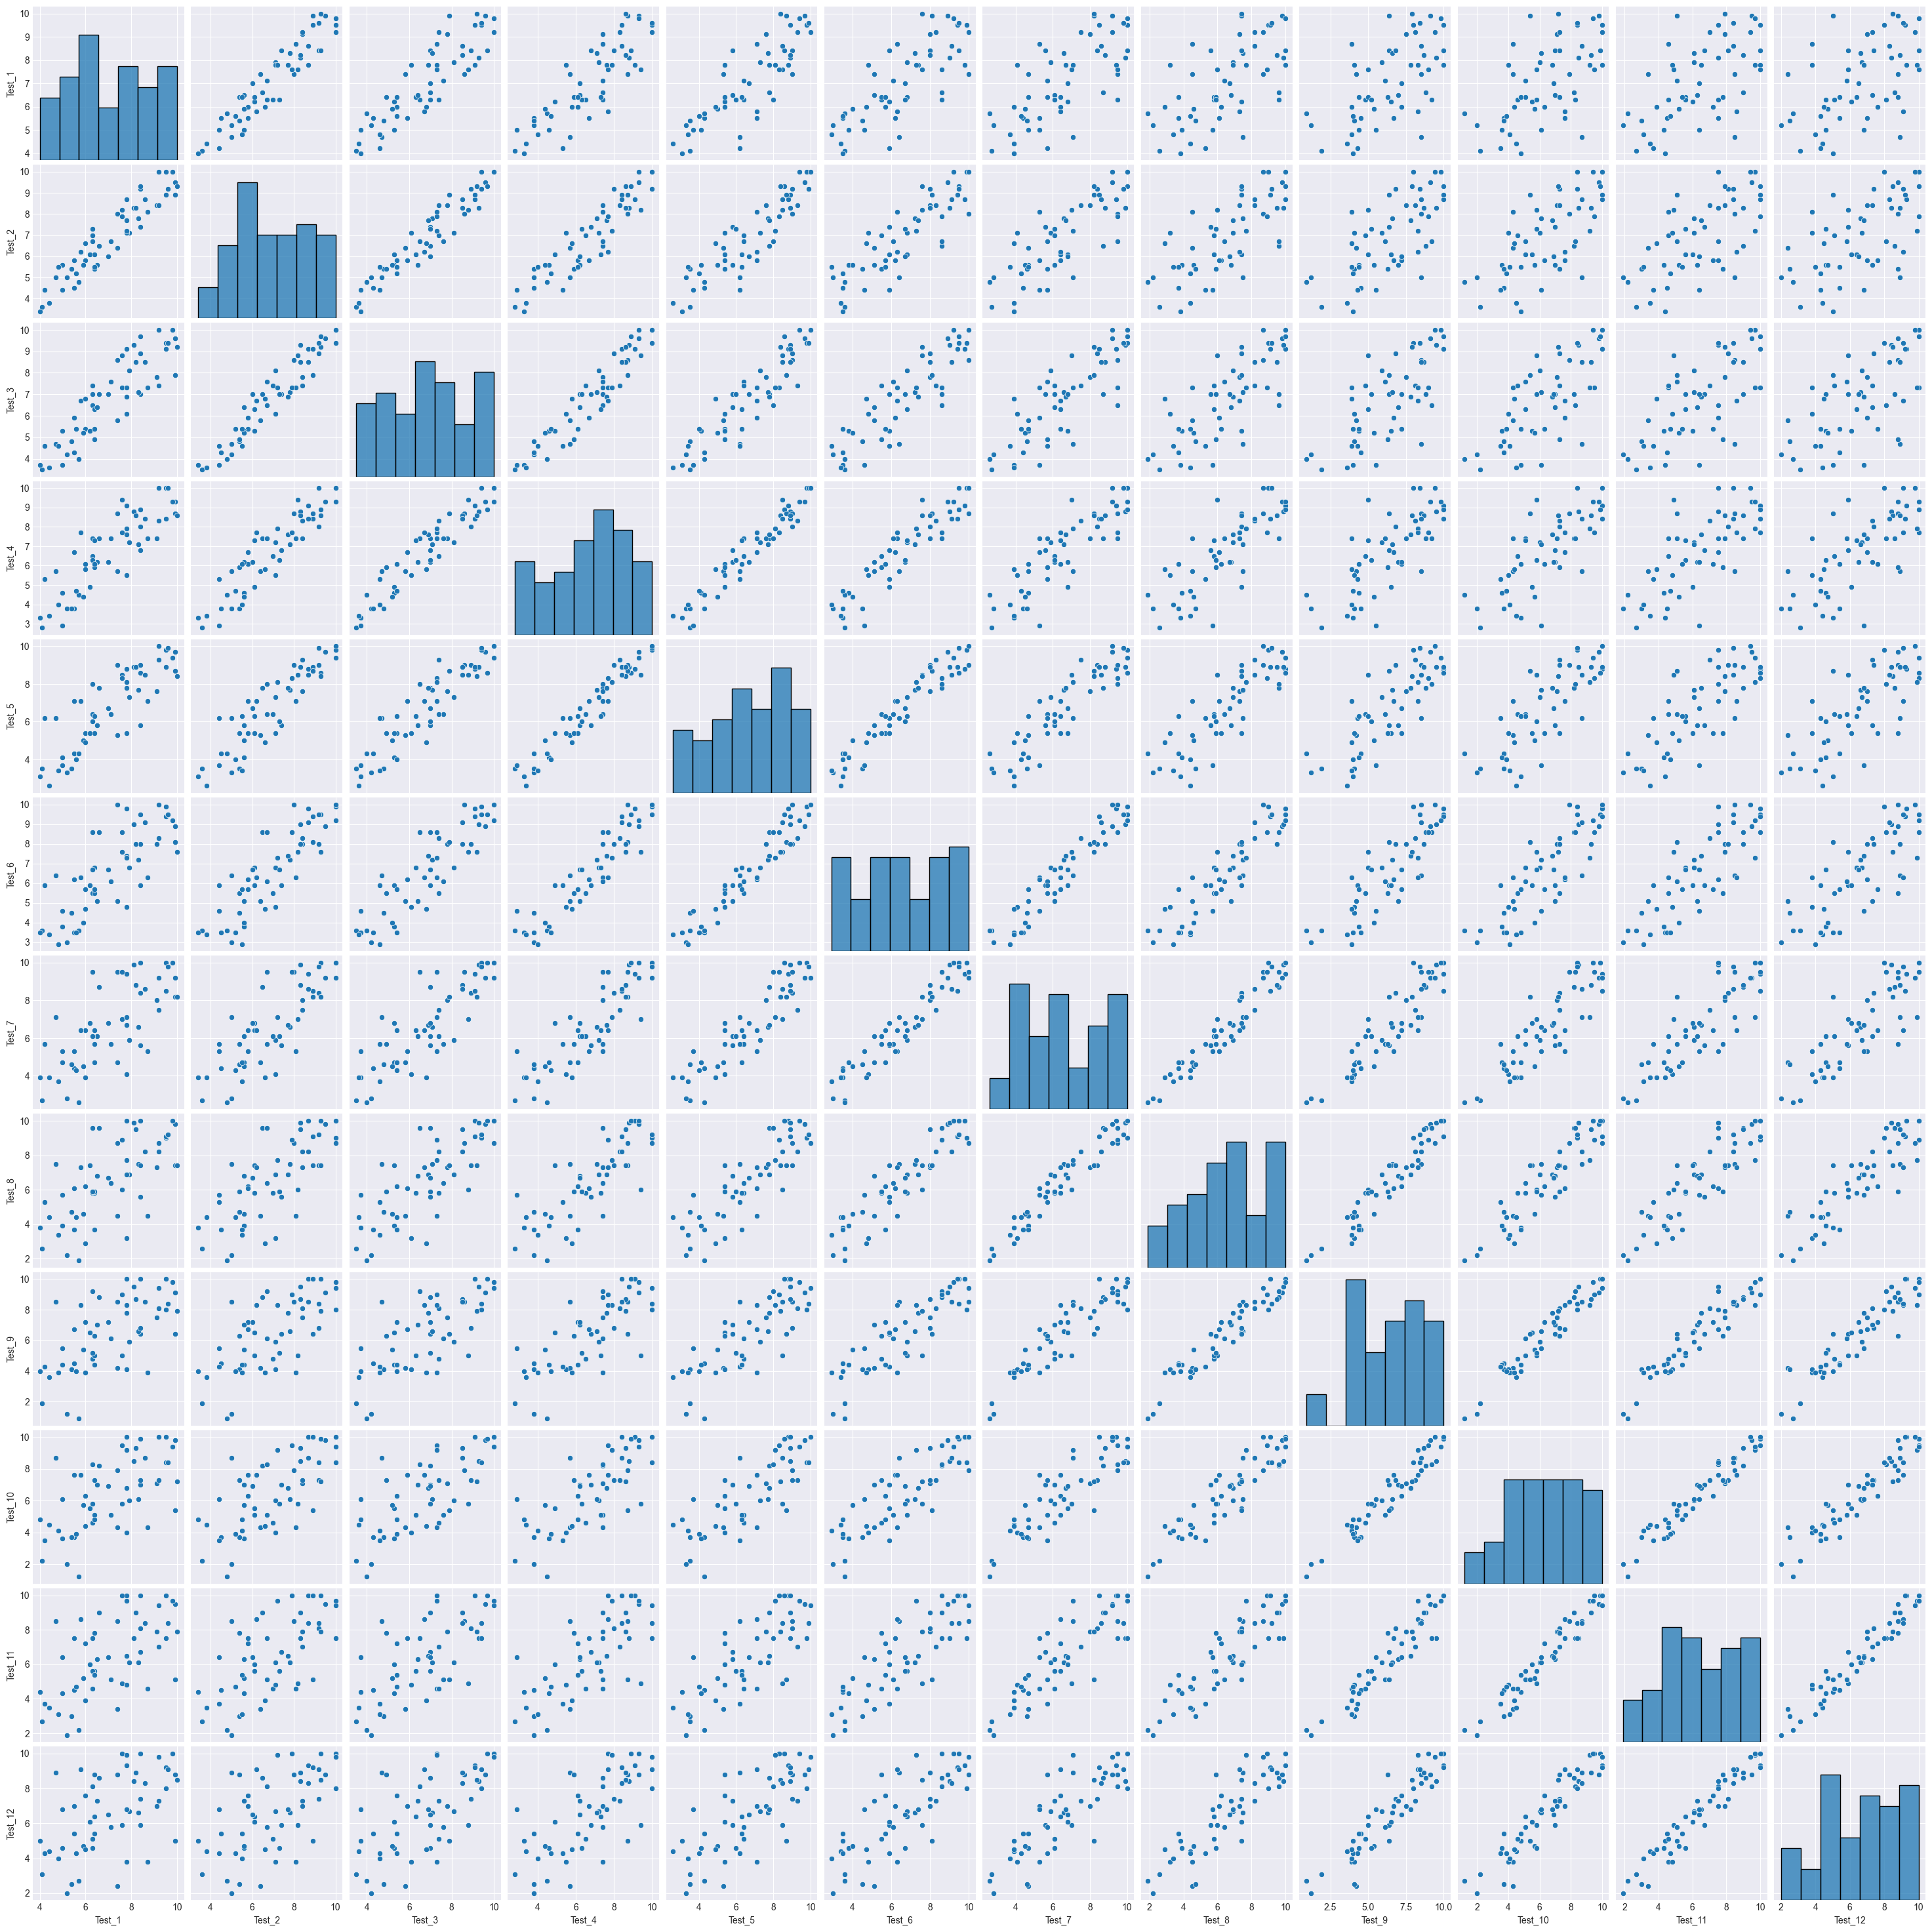

In [11]:
sns.pairplot(grades);

In [12]:
grades.corr(numeric_only=True).style.format('{:.2f}')

,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12
Test_1,1.00,0.94,0.88,0.85,0.84,0.78,0.72,0.65,0.62,0.61,0.59,0.52
Test_2,0.94,1.00,0.96,0.92,0.90,0.86,0.81,0.73,0.69,0.68,0.66,0.59
Test_3,0.88,0.96,1.00,0.95,0.91,0.88,0.84,0.78,0.74,0.73,0.70,0.66
Test_4,0.85,0.92,0.95,1.00,0.97,0.93,0.87,0.81,0.77,0.76,0.74,0.72
Test_5,0.84,0.90,0.91,0.97,1.00,0.96,0.90,0.86,0.81,0.79,0.78,0.75
Test_6,0.78,0.86,0.88,0.93,0.96,1.00,0.95,0.91,0.86,0.84,0.82,0.79
Test_7,0.72,0.81,0.84,0.87,0.90,0.95,1.00,0.96,0.92,0.88,0.86,0.84
Test_8,0.65,0.73,0.78,0.81,0.86,0.91,0.96,1.00,0.95,0.92,0.89,0.88
Test_9,0.62,0.69,0.74,0.77,0.81,0.86,0.92,0.95,1.00,0.96,0.94,0.93
Test_10,0.61,0.68,0.73,0.76,0.79,0.84,0.88,0.92,0.96,1.00,0.97,0.94


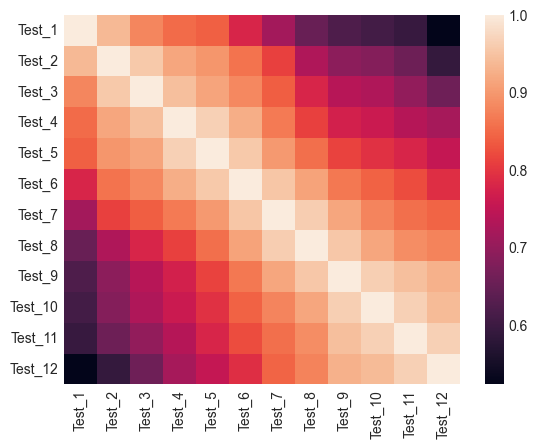

In [13]:
sns.heatmap(grades.corr(numeric_only=True));

We can conclude that the model has enough correlation to build a model with enough accuracy as a result.

# The model

In this project, I chose to use Linear Regression (in Scikit Learn) as the predictive technique since the context is straightfoward and easier to determine. However, there's no question that other statistical techniques would give better results.

The accuracy score will be the standard R\\(^2\\) Score.

In [14]:
# Splitting the data into train and test variables and calling the module
X = grades[['Test_1', 'Test_2',
            'Test_3', 'Test_4',
            'Test_5', 'Test_6',
            'Test_7', 'Test_8',
            'Test_9', 'Test_10', 'Test_11']]
Y = grades[['Test_12']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6, random_state=42)

model = LinearRegression()

In [15]:
# Training the model
model.fit(X_train, Y_train)

# Testing
model_test = model.predict(X_test)

# Getting accuracy score
success = r2_score(Y_test, model_test)
print(f'The accuracy is {success*100:.2f}%')

The accuracy is 93.98%


To finish, we're going to compare the results of the prediction with the actual grades.

In [16]:
# Creating a data frame with the predicted values
model_test = pd.DataFrame(model_test, columns=['Y_Predict'])
model_test['ID'] = range(len(model_test.index))

# Altering the data frame with the actual values
Y_test.reset_index(inplace=True)
Y_test['ID'] = range(len(Y_test.index))

In [17]:
# Creating a data frame with both results plus the mean
compare = pd.merge(model_test, Y_test, how='left', on=['ID'])
compare['Mean'] = (compare['Y_Predict'] + compare['Test_12']) / 2
compare[['Y_Predict', 'Test_12', 'Mean']].style.format('{:.2f}')

,Y_Predict,Test_12,Mean
0,10.23,9.30,9.77
1,2.52,3.10,2.81
2,6.44,6.40,6.42
3,2.17,2.00,2.08
4,5.96,6.10,6.03
5,5.92,6.80,6.36
6,9.39,9.20,9.29
7,6.63,7.30,6.97
8,8.84,9.10,8.97
9,8.37,8.40,8.38


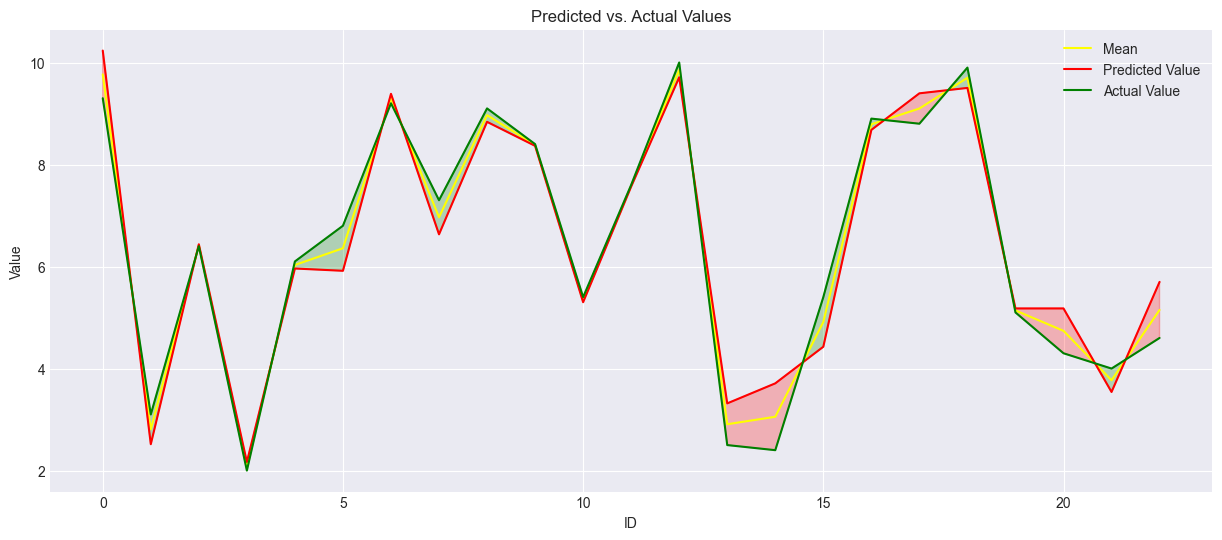

In [18]:
# Plotting the results for better visualization
fig, ay = plt.subplots(figsize=(15, 6))
sns.lineplot(data=compare, x='ID', y='Mean', color='yellow', label='Mean')
sns.lineplot(data=compare, x='ID', y='Y_Predict', color='red', label='Predicted Value')
sns.lineplot(data=compare, x='ID', y='Test_12', color='green', label='Actual Value')
ay.fill_between(
    compare['ID'], compare['Y_Predict'], compare['Test_12'],
    where=(compare['Y_Predict'] > compare['Test_12']),
    interpolate=True, color='red', alpha=0.25
    )
ay.fill_between(
    compare['ID'], compare['Y_Predict'], compare['Test_12'],
    where=(compare['Y_Predict'] < compare['Test_12']),
    interpolate=True, color='green', alpha=0.25
    )
ay.legend()
plt.ylabel('Value')
plt.title("Predicted vs. Actual Values");

Finally, we can see that the model is pretty accurate and ready to use. Let's see a final example of it working.

In [19]:
example = model.predict([[10, 9.7, 8.3, 9.2, 7, 9.9, 8.7, 7.8, 7.9, 8, 8.9]])

print(f'The student has almost 94% of chance to get a {float(example):.2f} grade.')

The student has almost 94% of chance to get a 8.90 grade.


c:\Users\louzs\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\louzs\AppData\Local\Temp\ipykernel_15332\3823786541.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'The student has almost 94% of chance to get a {float(example):.2f} grade.')
